<a href="https://colab.research.google.com/github/Bandna123/BK-_RevaPGDBM_MyProjects/blob/master/k_meansand_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the dataset
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
dataset = pd.read_excel("cs.xlsx",encoding="ISO-8859-1",dtype={'Customer_Code': str,'Invoice_No': str})
dataset['Invoice_Date'] = pd.to_datetime(dataset['Invoice_Date'])
dataset.shape
dataset.head(5)

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,2019-04-01,883.93,30000041419,wrongly order punched,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,2019-04-01,530.80,30000041496,wrongly order punched,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,2019-04-01,491.07,30000041081,sales return against no:159618003/8842 dt:25-1...,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,2019-04-01,883.93,30000040955,NaN,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,2019-04-01,441.96,30000041147,customer cancel the order,-441.96,Bangalore,Karnataka


In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML

In [ ]:
dataset.isnull().sum()

Invoice_No                  0
SKU_Code                    0
Business_Partner            0
Item_Description            0
Quantity                    0
Invoice_Date                0
Unit_Price                  0
Customer_Code               0
Invoice_Description    125858
Total_Value                 0
Customer_City               0
State                       0
dtype: int64

In [ ]:
dataset.shape

(279990, 12)

In [ ]:
#drp invoice_descrption column because more then 30% are missing values
data=dataset.drop(['Invoice_Description'],axis=1)

In [ ]:
data.head(100)

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Total_Value,Customer_City,State
0,1596180042798,66555338,U K OPTICAL CENTRE,AIROPTIX AQC SPH 6PK -0400,-1,2019-04-01,883.930,30000041419,-883.93,Bangalore,Karnataka
1,1596180042799,411226,VISION WORLD PVT LTD,OPTIX 6P -0350,-1,2019-04-01,530.800,30000041496,-530.80,Bangalore,Karnataka
2,1596180042800,66532759,JAWAHAR OPTICIANS,AIROPTIX TORIC 3-PK -0475 125 030,-1,2019-04-01,491.070,30000041081,-491.07,Dharwad,Karnataka
3,1596180042801,66555185,EYE PLUS OPTICIANS,AIROPTIX AQC SPH 6PK -0025,-1,2019-04-01,883.930,30000040955,-883.93,Hubli,Karnataka
4,1596180042802,545085,MIRLAY EYE CARE,FRESHLOOK 1-D COL 10 -0300 P HAZEL,-1,2019-04-01,441.960,30000041147,-441.96,Bangalore,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...
95,1596180042867,411234,SHAH OPTICALS,OPTIX 6P -0550,-1,2019-01-25,530.800,30000041316,-530.80,Davangere,Karnataka
96,1596180042868,21633476,LONDON OPTICALS (UDUPI),FL UV COLORS 2PK -0250 HAZEL,-1,2019-01-25,433.040,30000057398,-433.04,Udupi,Karnataka
97,1596180042870,7239850,OPTICSUN EYEWEAR,O-F Puremoist 10 OZ (300 ML),-5,2019-01-28,374.838,30000041202,-1874.19,Bangalore,Karnataka
98,1596180042872,547594,U K OPTICAL CENTRE,DAILIES AQUACOMFORT PLUS 30-PK -0275,-1,2019-01-29,735.450,30000041419,-735.45,Bangalore,Karnataka


In [ ]:
#again check for missing count
data.isnull().sum()

Invoice_No          0
SKU_Code            0
Business_Partner    0
Item_Description    0
Quantity            0
Invoice_Date        0
Unit_Price          0
Customer_Code       0
Total_Value         0
Customer_City       0
State               0
dtype: int64

In [ ]:
#find the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279990 entries, 0 to 279989
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_No        279990 non-null  object        
 1   SKU_Code          279990 non-null  object        
 2   Business_Partner  279990 non-null  object        
 3   Item_Description  279990 non-null  object        
 4   Quantity          279990 non-null  int64         
 5   Invoice_Date      279990 non-null  datetime64[ns]
 6   Unit_Price        279990 non-null  float64       
 7   Customer_Code     279990 non-null  object        
 8   Total_Value       279990 non-null  float64       
 9   Customer_City     279990 non-null  object        
 10  State             279990 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 23.5+ MB


In [ ]:
print('Duplicate data entries: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Duplicate data entries: 0


In [ ]:
# gives some infomation on columns types and number of null values
df_initial=dataset
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )
print 
display(tab_info)

---------- Display information about column types and number of null values ----------


,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
column type,object,object,object,object,int64,datetime64[ns],float64,object,object,float64,object,object
null values (nb),0,0,0,0,0,0,0,0,125858,0,0,0
null values (%),0,0,0,0,0,0,0,0,44.9509,0,0,0


In [ ]:

df_initial.dropna(axis = 0, subset = ['Customer_Code'], inplace = True)
print('Dataframe dimensions:', df_initial.shape)
# gives some information on columns types and number of null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (279990, 12)


,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
column type,object,object,object,object,int64,datetime64[ns],float64,object,object,float64,object,object
null values (nb),0,0,0,0,0,0,0,0,125858,0,0,0
null values (%),0,0,0,0,0,0,0,0,44.9509,0,0,0


In [ ]:
print('Duplicate data entries: {}'.format(df_initial.duplicated().sum()))
df_initial.drop_duplicates(inplace = True)


Duplicate data entries: 0


In [ ]:
temp = df_initial[['Customer_Code', 'Invoice_No', 'State']].groupby(['Customer_Code', 'Invoice_No', 'State']).count()
temp = temp.reset_index(drop = False)
countries = temp['State'].value_counts()
print('No. of State in dataframe: {}'.format(len(countries)))

No. of State in dataframe: 22


In [ ]:
temp_no_of_order_per_count = df_initial[['Customer_Code','State']].groupby(['State']).count()
temp_no_of_order_per_count = temp_no_of_order_per_count.reset_index(drop = False)

print('-' * 10 + " State-wise order calculation "+ '-' * 10)
print
print (temp_no_of_order_per_count.sort_values(
    by='Customer_Code', ascending=False).rename(index=str,
                                        columns={"Customer_Code": "State wise number of order"}))

---------- State-wise order calculation ----------
              State  State wise number of order
12      Maharashtra                       83567
3             Delhi                       48990
17       Tamil Nadu                       37585
5           Gujarat                       31854
9         Karnataka                       22208
21      West Bengal                       12316
19    Uttar Pradesh                        8800
6           Haryana                        8691
15           Punjab                        6303
18        Telangana                        5019
2        Chandigarh                        4244
11   Madhya Pradesh                        3486
4               Goa                        2307
10           Kerala                        1411
16        Rajasthan                        1053
14       Puducherry                         775
20      Uttarakhand                         535
0    Andhra Pradesh                         405
1             Assam                  

In [ ]:

pd.DataFrame([{'products': len(df_initial['SKU_Code'].value_counts()),    
               'transactions': len(df_initial['Invoice_No'].value_counts()),
               'customers': len(df_initial['Customer_Code'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], 
              index = ['Quantity'])

,products,transactions,customers
Quantity,5728,92915,3197


In [ ]:
temp = df_initial.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['Invoice_Date'].count()
nb_products_per_basket = temp.rename(columns = {'Invoice_Date':'Number of products'})
nb_products_per_basket[:10].sort_values('Customer_Code')

,Customer_Code,Invoice_No,Number of products
0,30000040295,1631180039000,1
1,30000040295,16400248,1
2,30000040295,16400505,10
3,30000040295,16400955,1
4,30000040295,56400600,2
5,30000040295,56400868,2
6,30000040295,56401838,1
7,30000040295,56402072,1
8,30000040295,56402665,1
9,30000040295,56402748,2


In [ ]:
display(df_initial.sort_values('Customer_Code')[:5])

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State
208385,56404340,21600515,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 HONEY,1,2019-09-27,433.040,30000040295,NaN,433.04,Ahmedabad,Gujarat
22540,1631180039000,7239850,A AND K ENTERPRISE(VIEW POINT),O-F Puremoist 10 OZ (300 ML),2,2019-01-19,374.840,30000040295,NaN,749.68,Ahmedabad,Gujarat
160251,56402835,21690646,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 P.HAZEL,1,2019-07-27,0.000,30000040295,FLCB (9+1) OFFER,0.00,Ahmedabad,Gujarat
160252,56402835,21600034,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK -0225 GREEN,5,2019-07-27,433.038,30000040295,FLCB (9+1) OFFER,2165.19,Ahmedabad,Gujarat
160253,56402835,21690165,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK -0225 T.SAPH,5,2019-07-27,433.036,30000040295,FLCB (9+1) OFFER,2165.18,Ahmedabad,Gujarat


In [ ]:
df_check = df_initial[df_initial['Quantity'] < 0][['Customer_Code','Quantity',
                                                   'SKU_Code','Item_Description','Unit_Price']]
for index, col in  df_check.iterrows():
    if df_initial[(df_initial['Customer_Code'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Item_Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

Customer_Code                       30000041419
Quantity                                     -1
SKU_Code                               66555338
Item_Description    AIROPTIX AQC SPH 6PK  -0400
Unit_Price                               883.93
Name: 0, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [ ]:
df_check = df_initial[(df_initial['Quantity'] < 0) & (df_initial['Item_Description'] != 'Discount')][
                                 ['Customer_Code','Quantity','SKU_Code',
                                  'Item_Description','Unit_Price']]

for index, col in  df_check.iterrows():
    if df_initial[(df_initial['Customer_Code'] == col[0]) & (df_initial['Quantity'] == -col[1]) 
                & (df_initial['Item_Description'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

0 Customer_Code                       30000041419
Quantity                                     -1
SKU_Code                               66555338
Item_Description    AIROPTIX AQC SPH 6PK  -0400
Unit_Price                               883.93
Name: 0, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [ ]:
df_cleaned = df_initial.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['Quantity'] > 0) or col['Item_Description'] == 'Discount': continue        
    df_test = df_initial[(df_initial['Customer_Code'] == col['Customer_Code']) &
                         (df_initial['SKU_Code']  == col['SKU_Code']) & 
                         (df_initial['Invoice_Date'] < col['Invoice_Date']) & 
                         (df_initial['Quantity']   > 0)].copy()

    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
   
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
   
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

In [ ]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 9403
doubtfull_entry: 7463


In [ ]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['SKU_Code'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 106


,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State,QuantityCanceled
160,1600180041342,66555185,VIJAY OPTICALS (NAGPUR),AIROPTIX AQC SPH 6PK -0025,-35,2019-01-28,883.928857,30000051377,Sales Reversal Entry For Invoice No:- 16001800...,-30937.51,Nagpur,Maharashtra,0
174,1600180041343,66555314,VIJAY OPTICALS (NAGPUR),AIROPTIX AQC SPH 6PK -0350,-8,2019-01-28,883.928750,30000051377,Sales Reversal Entry For Invoice No:- 16001800...,-7071.43,Nagpur,Maharashtra,0
591,1609180044557,544994,OPTIC HOUSE (RAJOURI GARDEN),FRESHLOOK 1-D COL 10 - PLANO 0000 BLUE,-9,2019-09-01,441.962222,30000043577,PRA No.: 30302 (Customer Not accepted),-3977.66,New Delhi,Delhi,0
800,162318004571,7239850,AYA SINGH AND SONS,O-F Puremoist 10 OZ (300 ML),-20,2019-12-01,337.355000,30000045156,NaN,-6747.10,Amritsar,Punjab,0
24910,26200057,21599499,SPECTS CORPORATION,FL UV CB 2PK -0300 GRAY,-3,2019-02-22,433.040000,30000048225,Pra No. 35711 (Wrong Order),-1299.12,Delhi (DL),Delhi,0


In [ ]:
df_cleaned[(df_cleaned['Customer_Code'] == 30000045156) & (df_cleaned['SKU_Code'] == '544994')]


,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State,QuantityCanceled


In [ ]:
df_cleaned['Total_Value'] = df_cleaned['Unit_Price'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('Customer_Code')[:5]

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State,QuantityCanceled
44002,16400505,10074596,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 STERLING GRAY,1,2019-02-19,433.04,30000040295,FLCB (9+1 ),433.04,Ahmedabad,Gujarat,0
22540,1631180039000,7239850,A AND K ENTERPRISE(VIEW POINT),O-F Puremoist 10 OZ (300 ML),2,2019-01-19,374.84,30000040295,NaN,749.68,Ahmedabad,Gujarat,0
160251,56402835,21690646,A AND K ENTERPRISE(VIEW POINT),FL UV CB 2PK 0000 P.HAZEL,1,2019-07-27,0.00,30000040295,FLCB (9+1) OFFER,0.00,Ahmedabad,Gujarat,0
68837,16400955,546152,A AND K ENTERPRISE(VIEW POINT),DAILIES VISITINT SPHERIC 30-PACK -0150,1,2019-04-03,540.00,30000040295,NaN,540.00,Ahmedabad,Gujarat,0
140791,56401838,7228991,A AND K ENTERPRISE(VIEW POINT),O-F Replenish 300ML /LC < IND,3,2019-07-06,277.05,30000040295,NaN,831.15,Ahmedabad,Gujarat,0


In [ ]:

# sum of purchases / user & order
temp = df_cleaned.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['Total_Value'].sum()
basket_price = temp.rename(columns = {'Total_Value':'Basket Price'})

# date of the order
df_cleaned['InvoiceDate_int'] = df_cleaned['Invoice_Date'].astype('int64')
temp = df_cleaned.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'Invoice_Date'] = pd.to_datetime(temp['InvoiceDate_int'])

# selection of significant entries
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer_Code')[:6]

,Customer_Code,Invoice_No,Basket Price,Invoice_Date
0,30000040295,1631180039000,749.68,2019-01-19
17,30000040295,56406290,433.04,2019-11-29
16,30000040295,56404978,441.96,2019-10-22
15,30000040295,56404774,1205.08,2019-09-10
13,30000040295,56404363,433.04,2019-09-27
11,30000040295,56404301,1767.86,2019-09-26


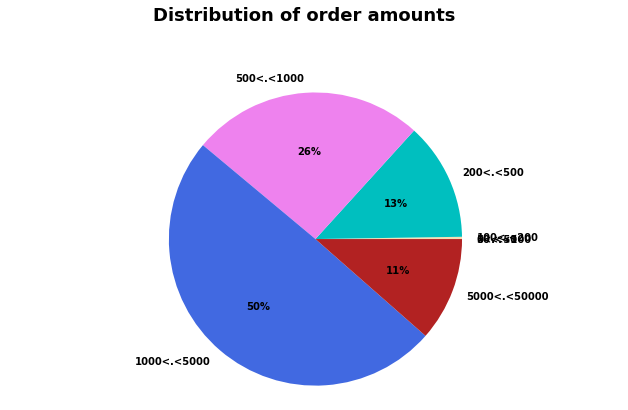

In [ ]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

In [ ]:

def keywords_inventory(dataframe, colonne = 'Item_Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    is_noun = lambda pos: pos[:2] == 'NN'
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [ ]:
df_produits = pd.DataFrame(df_initial['Item_Description'].unique()).rename(columns = {0:'Item_Description'})

In [ ]:
df_produits

,Item_Description
0,AIROPTIX AQC SPH 6PK -0400
1,OPTIX 6P -0350
2,AIROPTIX TORIC 3-PK -0475 125 030
3,AIROPTIX AQC SPH 6PK -0025
4,FRESHLOOK 1-D COL 10 -0300 P HAZEL
...,...
5720,AIROPTIX TORIC 3-PK -0050 225 150
5721,AIROPTIX TORIC 6-PK -0900 075 040
5722,AIROPTIX TORIC 6-PK -0475 175 030
5723,AIROPTIX TORIC 6-PK -0225 175 120


In [ ]:
import nltk
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

number of keywords in variable 'Item_Description': 181


In [ ]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

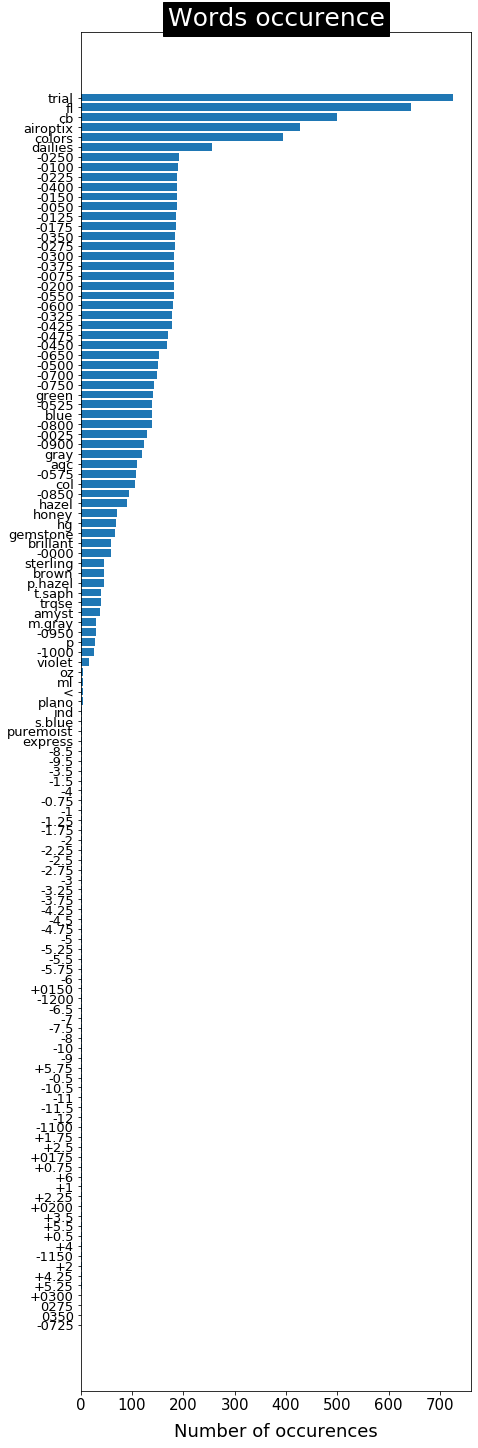

In [ ]:

liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [ ]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
 
list_products.sort(key = lambda x:x[1], reverse = True)
print('Preserved words:', len(list_products))

Preserved words: 52


In [ ]:

liste_produits = df_cleaned['Item_Description'].unique()
#print(liste_produits[0:2])
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))
#print(X[0:1])

In [ ]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    #print(i)
    #print(col)
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Item_Description'] == prod]['Unit_Price'].mean()
    #print (prix)
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [ ]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))
X

range    number of products   
--------------------
0<.<1       0                   
1<.<2       0                   
2<.<3       0                   
3<.<5       0                   
5<.<10      0                   
.>10        5713                


,trial,airoptix,colors,dailies,-0250,-0100,-0225,-0400,-0150,-0050,...,m.gray,-0950,-1000,violet,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5709,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5710,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5711,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=pd.DataFrame(X)
matrix = X.values
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.20804275778790757
For n_clusters = 4 The average silhouette_score is : 0.18142294392159744
For n_clusters = 5 The average silhouette_score is : 0.1855552488203717
For n_clusters = 6 The average silhouette_score is : 0.13146049526119244
For n_clusters = 7 The average silhouette_score is : 0.15026015967388665
For n_clusters = 8 The average silhouette_score is : 0.18278721839273732
For n_clusters = 9 The average silhouette_score is : 0.17820549697918958


In [ ]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.184:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.13547634368269915
For n_clusters = 5 The average silhouette_score is : 0.134973963600927
For n_clusters = 5 The average silhouette_score is : 0.1369818546558109
For n_clusters = 5 The average silhouette_score is : 0.1855552488203717


In [ ]:
pd.Series(clusters).value_counts()

0    3708
1     874
2     635
4     249
3     247
dtype: int64

In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    #plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        #color = cm.spectral(float(i) / n_clusters) facecolor=color, edgecolor=color,       
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
       
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

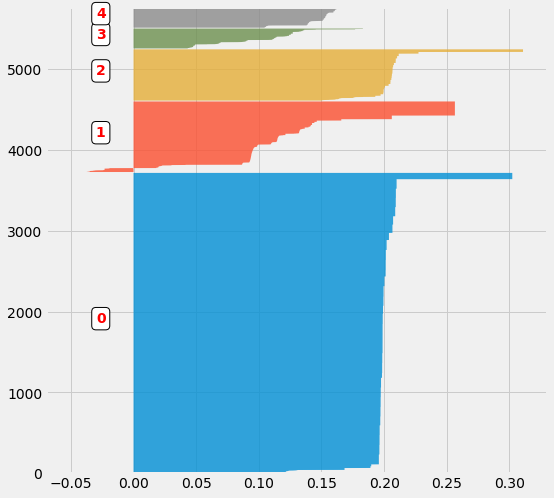

In [ ]:
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)

# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [ ]:
#wordcloud
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

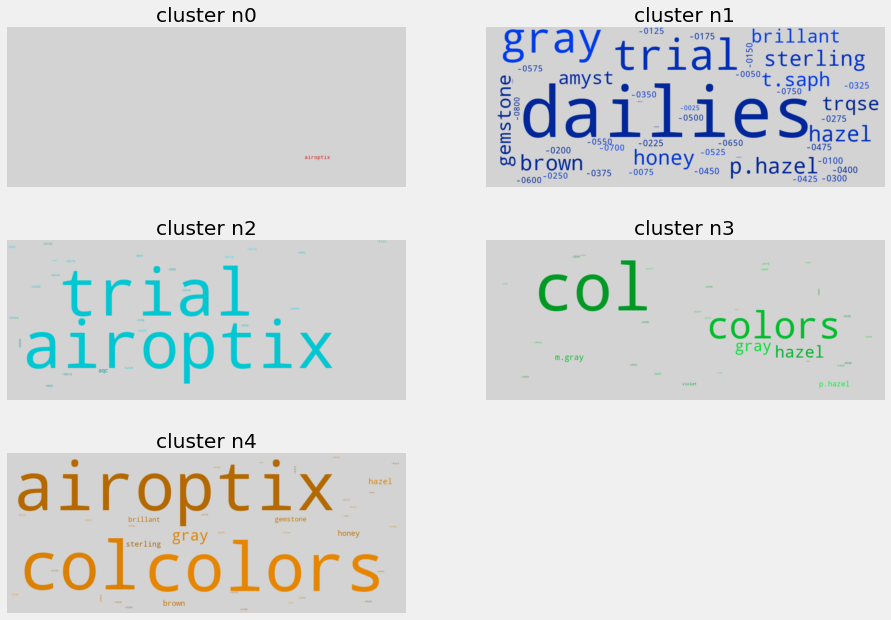

In [ ]:

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [ ]:

pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

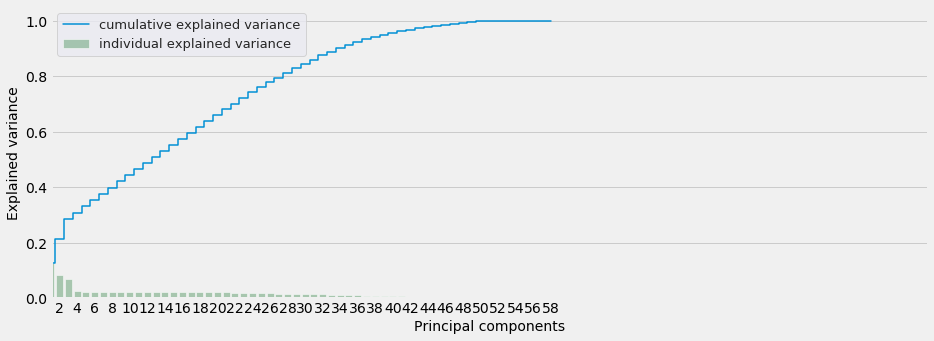

In [ ]:

fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

We see that the number of components required to explain the data is extremely important: we need more than 100 components to explain 90% of the variance of the data. In practice, I decide to keep only a limited number of components since this decomposition is only performed to visualize the data:

In [ ]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

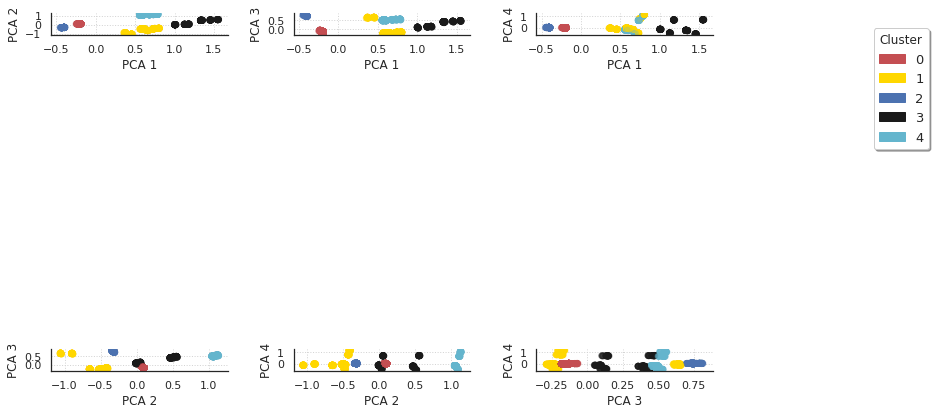

In [ ]:

import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        

comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster',
           shadow = True, frameon = True, framealpha = 1,fontsize = 13, 
           bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()


### Customer categories
##### Steps for generatin



In [ ]:
#Formatting data
#Grouping products
#Splitting of the dataset
#Grouping orders
#Creating customer categories
#Data encoding
#Creating categories

## Formatting data
In the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable categ_product where I indicate the cluster of each product

In [ ]:
df_cleaned

,Invoice_No,SKU_Code,Business_Partner,Item_Description,Quantity,Invoice_Date,Unit_Price,Customer_Code,Invoice_Description,Total_Value,Customer_City,State,QuantityCanceled
160,1600180041342,66555185,VIJAY OPTICALS (NAGPUR),AIROPTIX AQC SPH 6PK -0025,-35,2019-01-28,883.928857,30000051377,Sales Reversal Entry For Invoice No:- 16001800...,-30937.51,Nagpur,Maharashtra,0
174,1600180041343,66555314,VIJAY OPTICALS (NAGPUR),AIROPTIX AQC SPH 6PK -0350,-8,2019-01-28,883.928750,30000051377,Sales Reversal Entry For Invoice No:- 16001800...,-7071.43,Nagpur,Maharashtra,0
591,1609180044557,544994,OPTIC HOUSE (RAJOURI GARDEN),FRESHLOOK 1-D COL 10 - PLANO 0000 BLUE,-9,2019-09-01,441.962222,30000043577,PRA No.: 30302 (Customer Not accepted),-3977.66,New Delhi,Delhi,0
800,162318004571,7239850,AYA SINGH AND SONS,O-F Puremoist 10 OZ (300 ML),-20,2019-12-01,337.355000,30000045156,NaN,-6747.10,Amritsar,Punjab,0
1401,15961800312482,10119144,NARAYANA NETHRALAYA,AIROPTIX HG SPH 6PK -0575,1,2019-01-01,1454.150000,30000041159,Delivery address: Narayana nethralaya Bomsandra,1454.15,Bangalore,Karnataka,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279878,56407380,545045,DELUX OPTIC CENTRE,FRESHLOOK 1-D COL 10 - PLANO 0000 GREEN,1,2019-12-31,441.960000,30000040362,URGENT PLS DISPATCH IT TODAY ONLY,441.96,Vadodara (GJ),Gujarat,0
279879,56407380,545096,DELUX OPTIC CENTRE,FRESHLOOK 1-D COL 10 - PLANO 0000 P HAZEL,1,2019-12-31,441.960000,30000040362,URGENT PLS DISPATCH IT TODAY ONLY,441.96,Vadodara (GJ),Gujarat,0
279880,56407381,66555277,NEW SHREE SANTRAM CHASHMAGHAR,AIROPTIX AQC SPH 6PK -0250,2,2019-12-31,883.930000,30000040561,NaN,1767.86,Nadiad,Gujarat,0
279904,159619004379,66555215,OPTIC I (MADIVALA),AIROPTIX AQC SPH 6PK -0100,-3,2019-05-12,589.286667,30000056627,Against PRA no:19955 dtd :28/11/2019,-1767.86,Bangalore,Karnataka,0


In [ ]:
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Item_Description'].map(corresp)
df_cleaned[['Invoice_No', 'Item_Description','categ_product']][:10]

,Invoice_No,Item_Description,categ_product
160,1600180041342,AIROPTIX AQC SPH 6PK -0025,0
174,1600180041343,AIROPTIX AQC SPH 6PK -0350,0
591,1609180044557,FRESHLOOK 1-D COL 10 - PLANO 0000 BLUE,3
800,162318004571,O-F Puremoist 10 OZ (300 ML),1
1401,15961800312482,AIROPTIX HG SPH 6PK -0575,0
1402,15961800312483,AIROPTIX TORIC 3-PK -0475 125 020,0
1403,15961800312483,AIROPTIX TORIC 3-PK -0500 075 160,0
1404,15961800312484,AIROPTIX TORIC 3-PK -0475 175 180,0
1405,15961800312484,AIROPTIX TORIC 3-PK -0500 175 180,0
1406,15961800312485,AIROPTIX TORIC 3-PK -0075 225 010,0


## Grouping products
In a second step, I decide to create the categ_N variables (with $ N \in [0: 4]$) that contains the amount spent in each product category:

In [ ]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['Unit_Price'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)


df_cleaned[['Invoice_No', 'Item_Description', 
            'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:100]

,Invoice_No,Item_Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
160,1600180041342,AIROPTIX AQC SPH 6PK -0025,0,0.00,0.00,0.0,0.0,0.0
174,1600180041343,AIROPTIX AQC SPH 6PK -0350,0,0.00,0.00,0.0,0.0,0.0
591,1609180044557,FRESHLOOK 1-D COL 10 - PLANO 0000 BLUE,3,0.00,0.00,0.0,0.0,0.0
800,162318004571,O-F Puremoist 10 OZ (300 ML),1,0.00,0.00,0.0,0.0,0.0
1401,15961800312482,AIROPTIX HG SPH 6PK -0575,0,1454.15,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1492,15961800312714,O-F Replenish 120ML /LC < IND,1,0.00,1401.53,0.0,0.0,0.0
1493,15961800312715,OPTIX 6P -0025,1,0.00,21232.15,0.0,0.0,0.0
1494,15961800312717,AIROPTIX TORIC 3-PK -0325 175 010,0,491.07,0.00,0.0,0.0,0.0
1495,15961800312718,AIROPTIX AQC SPH 6PK -0425,0,883.93,0.00,0.0,0.0,0.0



Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 5 categories of products:

In [ ]:
# sum of purchases / user & order
temp = df_cleaned.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['Total_Value'].sum()
basket_price = temp.rename(columns = {'Total_Value':'Basket Price'})

# percentage of the price of the order / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 

# date of the order

df_cleaned['InvoiceDate_int'] = df_cleaned['Invoice_Date'].astype('int64')
temp = df_cleaned.groupby(by=['Customer_Code', 'Invoice_No'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'Invoice_Date'] = pd.to_datetime(temp['InvoiceDate_int'])

# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('Customer_Code', ascending = True)[:5]

,Customer_Code,Invoice_No,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,Invoice_Date
0,30000040295,1631180039000,749.68,0.00,749.68,0.0,0.00,0.0,2019-01-19
17,30000040295,56406290,433.04,0.00,433.04,0.0,0.00,0.0,2019-11-29
16,30000040295,56404978,441.96,0.00,0.00,0.0,441.96,0.0,2019-10-22
15,30000040295,56404774,1205.08,1205.08,0.00,0.0,0.00,0.0,2019-09-10
13,30000040295,56404363,433.04,0.00,433.04,0.0,0.00,0.0,2019-09-27


## Splitting of data over time¶
The dataframe basket_price contains information for a period of 12 months. Later, one of the objectives will be to develop a model capable of characterizing and anticipating the habits of the customers visiting the site and this, from their first visit. In order to be able to test the model in a realistic way, I split the data set by retaining the first 10 months to develop the model and the following two months to test it:

In [ ]:
print(basket_price['Invoice_Date'].min(), '->',  basket_price['Invoice_Date'].max())

2019-01-01 00:00:00 -> 2019-12-31 00:00:00


In [ ]:
train_size = int(len(basket_price) * 0.80)
set_entrainement, set_test = basket_price[0:train_size], basket_price[train_size:len(basket_price)]
print('Observations: %d' % (len(basket_price)))
print('Training Observations: %d' % (len(set_entrainement)))
print('Testing Observations: %d' % (len(set_test)))
train_size

Observations: 80218
Training Observations: 64174
Testing Observations: 16044


64174

### Consumer Order Combinations
In a second step, I group together the different entries that correspond to the same user. I thus determine the number of purchases made by the user, as well as the minimum, maximum, average amounts and the total amount spent during all the visits:

In [ ]:
# of visits and stats on cart amount / users
transactions_per_user=basket_price.groupby(by=['Customer_Code'])['Basket Price'].agg(['count','min',
                                                                                   'max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['Customer_Code'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['Customer_Code'])['categ_0'].sum()
transactions_per_user.sort_values('Customer_Code', ascending = True)[:5]

,Customer_Code,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,30000040295,17,433.04,4330.37,1441.438824,24504.460,34.100078,56.881890,0.0,9.018032,0.000000
1,30000040297,36,277.05,7794.72,2003.844861,72138.415,11.077593,65.186468,0.0,23.281091,1.055138
2,30000040301,27,433.04,23866.11,5581.459630,150699.410,59.211685,40.788315,0.0,0.000000,0.000000
3,30000040302,37,433.04,15178.41,2842.328108,105166.140,28.450089,69.378604,0.0,0.000000,2.171307
4,30000040303,18,554.10,7850.89,1951.003889,35118.070,50.917605,49.082395,0.0,0.000000,0.000000


Finally, I define two additional variables that give the number of days elapsed since the first purchase ( FirstPurchase ) and the number of days since the last purchase ( LastPurchase ):

In [ ]:
last_date = basket_price['Invoice_Date'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['Customer_Code'])['Invoice_Date'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['Customer_Code'])['Invoice_Date'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['Invoice_Date']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['Invoice_Date']

transactions_per_user[:5]

,Customer_Code,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,30000040295,17,433.04,4330.37,1441.438824,24504.460,34.100078,56.881890,0.0,9.018032,0.000000,32,346
1,30000040297,36,277.05,7794.72,2003.844861,72138.415,11.077593,65.186468,0.0,23.281091,1.055138,1,340
2,30000040301,27,433.04,23866.11,5581.459630,150699.410,59.211685,40.788315,0.0,0.000000,0.000000,0,360
3,30000040302,37,433.04,15178.41,2842.328108,105166.140,28.450089,69.378604,0.0,0.000000,2.171307,0,337
4,30000040303,18,554.10,7850.89,1951.003889,35118.070,50.917605,49.082395,0.0,0.000000,0.000000,4,331


A customer category of particular interest is that of customers who make only one purchase. One of the objectives may be, for example, to target these customers in order to retain them. In part, I find that this type of customer represents 1/3 of the customers listed:

In [ ]:

n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("No. customers with single purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

No. customers with single purchase: 170/3105  (5.48%)


### Creation of customers categories
##### Data encoding
The dataframe transactions_per_user contains a summary of all the commands that were made. Each entry in this dataframe corresponds to a particular client. I use this information to characterize the different types of customers and only keep a subset of variables:

In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].values

In practice, the different variables I selected have quite different ranges of variation and before continuing the analysis, I create a matrix where these data are standardized:

In [ ]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [2.58351047e+01 8.47518279e+02 2.45253040e+04 4.45585998e+03
 3.68562294e+01 5.24286593e+01 0.00000000e+00 8.83735807e+00
 1.90992255e+00]


In the following, I will create clusters of customers. In practice, before creating these clusters, it is interesting to define a base of smaller dimension allowing to describe the scaled_matrix matrix. In this case, I will use this base in order to create a representation of the different clusters and thus verify the quality of the separation of the different groups. I therefore perform a PCA beforehand:

In [ ]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

and I represent the amount of variance explained by each of the components:

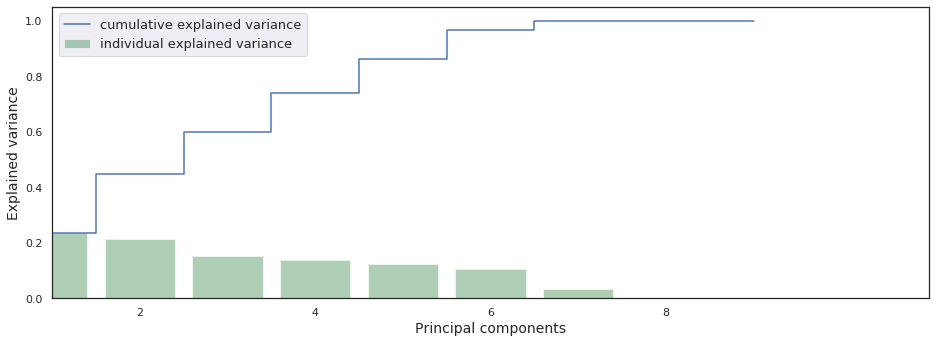

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);


### Creating customer categories
At this point, I define clusters of clients from the standardized matrix that was defined earlier and using the k-means algorithm fromscikit-learn. I choose the number of clusters based on the silhouette score and I find that the best score is obtained with 11 clusters:

In [ ]:

n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.326


In [ ]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['number of clients']).T

,5,0,2,7,4,1,3,6,8,10,9
number of clients,1051,893,706,246,105,76,13,7,5,2,1



in order to create a representation of the various clusters:

/home/arvind/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


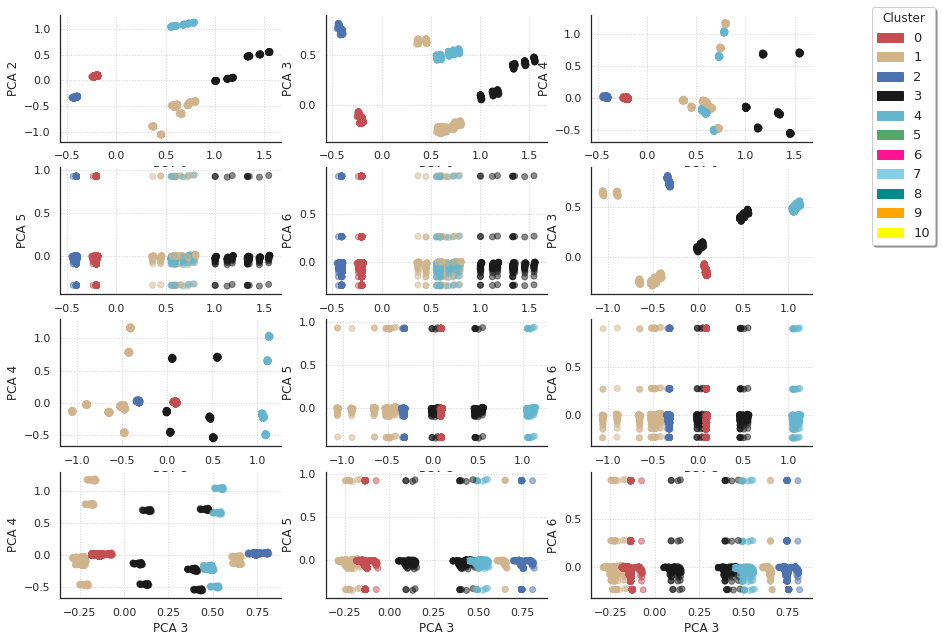

In [ ]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan',
                   9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        

comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()

From this representation, it can be seen, for example, that the first principal component allow to separate the tiniest clusters from the rest. More generally, we see that there is always a representation in which two clusters will appear to be distinct.

b/ Score of the silhouette intra-cluster

As with product categories, another way to look at the quality of the separation is to look at silouhette scores within different clusters:

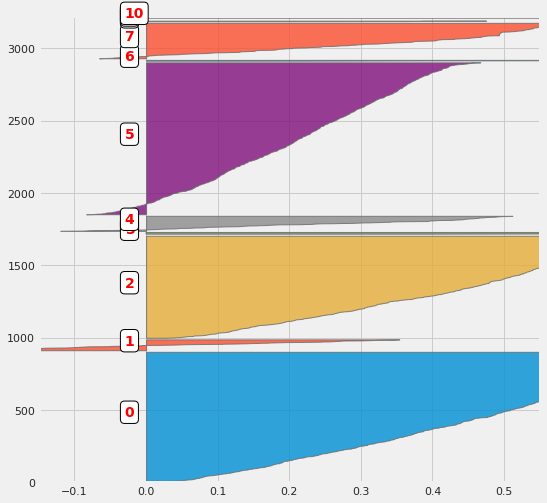

In [ ]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silhouette scores 
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values,clusters_clients)

### Customers morphotype

At this stage, I have verified that the different clusters are indeed disjoint (at least, in a global way). It remains to understand the habits of the customers in each cluster. To do so, I start by adding to the selected_customers dataframe a variable that defines the cluster to which each client belongs:

In [ ]:
selected_customers.loc[:, 'cluster'] = clusters_clients

Then, I average the contents of this dataframe by first selecting the different groups of clients. This gives access to, for example, the average baskets price, the number of visits or the total sums spent by the clients of the different clusters. I also determine the number of clients in each group (variable size ):

In [ ]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('Customer_Code', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')
merged_df

number of customers: 3105


,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,size
cluster,,,,,,,,,,,,,
3.0,3.769231,1341.517692,3.122078e+03,2184.168949,7.560189e+03,1.153849,6.698404,0.0,1.268080,90.879667,147.692308,250.846154,13
0.0,13.647256,927.113322,1.358348e+04,3270.201947,4.195858e+04,7.779381,87.406417,0.0,4.431667,0.423036,68.952968,295.601344,893
7.0,15.394309,858.496972,1.332095e+04,3957.732599,6.007661e+04,10.191178,33.365919,0.0,55.952003,0.492263,69.857724,307.609756,246
2.0,16.449008,749.050008,1.768599e+04,3625.652485,6.331572e+04,78.864556,18.433448,0.0,2.200722,0.566551,64.780453,303.528329,706
4.0,27.276190,486.060996,1.426219e+04,2725.215230,7.995863e+04,22.485902,44.189331,0.0,10.094359,23.247756,41.333333,330.323810,105
5.0,38.529020,449.302452,1.945480e+04,2770.385635,1.127665e+05,40.790552,52.424204,0.0,5.541938,1.256530,26.356803,334.532826,1051
6.0,1.714286,63762.761429,7.803511e+04,72014.265783,1.330862e+05,42.857143,26.001307,0.0,31.141550,0.000000,94.714286,176.428571,7
1.0,53.447368,892.889681,2.685390e+05,37982.596858,1.131927e+06,44.556535,41.366603,0.0,13.125643,0.970963,37.618421,335.631579,76
10.0,4.500000,3388.395000,9.512545e+05,344111.177250,1.564763e+06,69.823438,18.430353,0.0,11.746209,0.000000,4.000000,222.000000,2


Finally, I re-organize the content of the dataframe by ordering the different clusters: first, in relation to the amount wpsent in each product category and then, according to the total amount spent:

In [ ]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

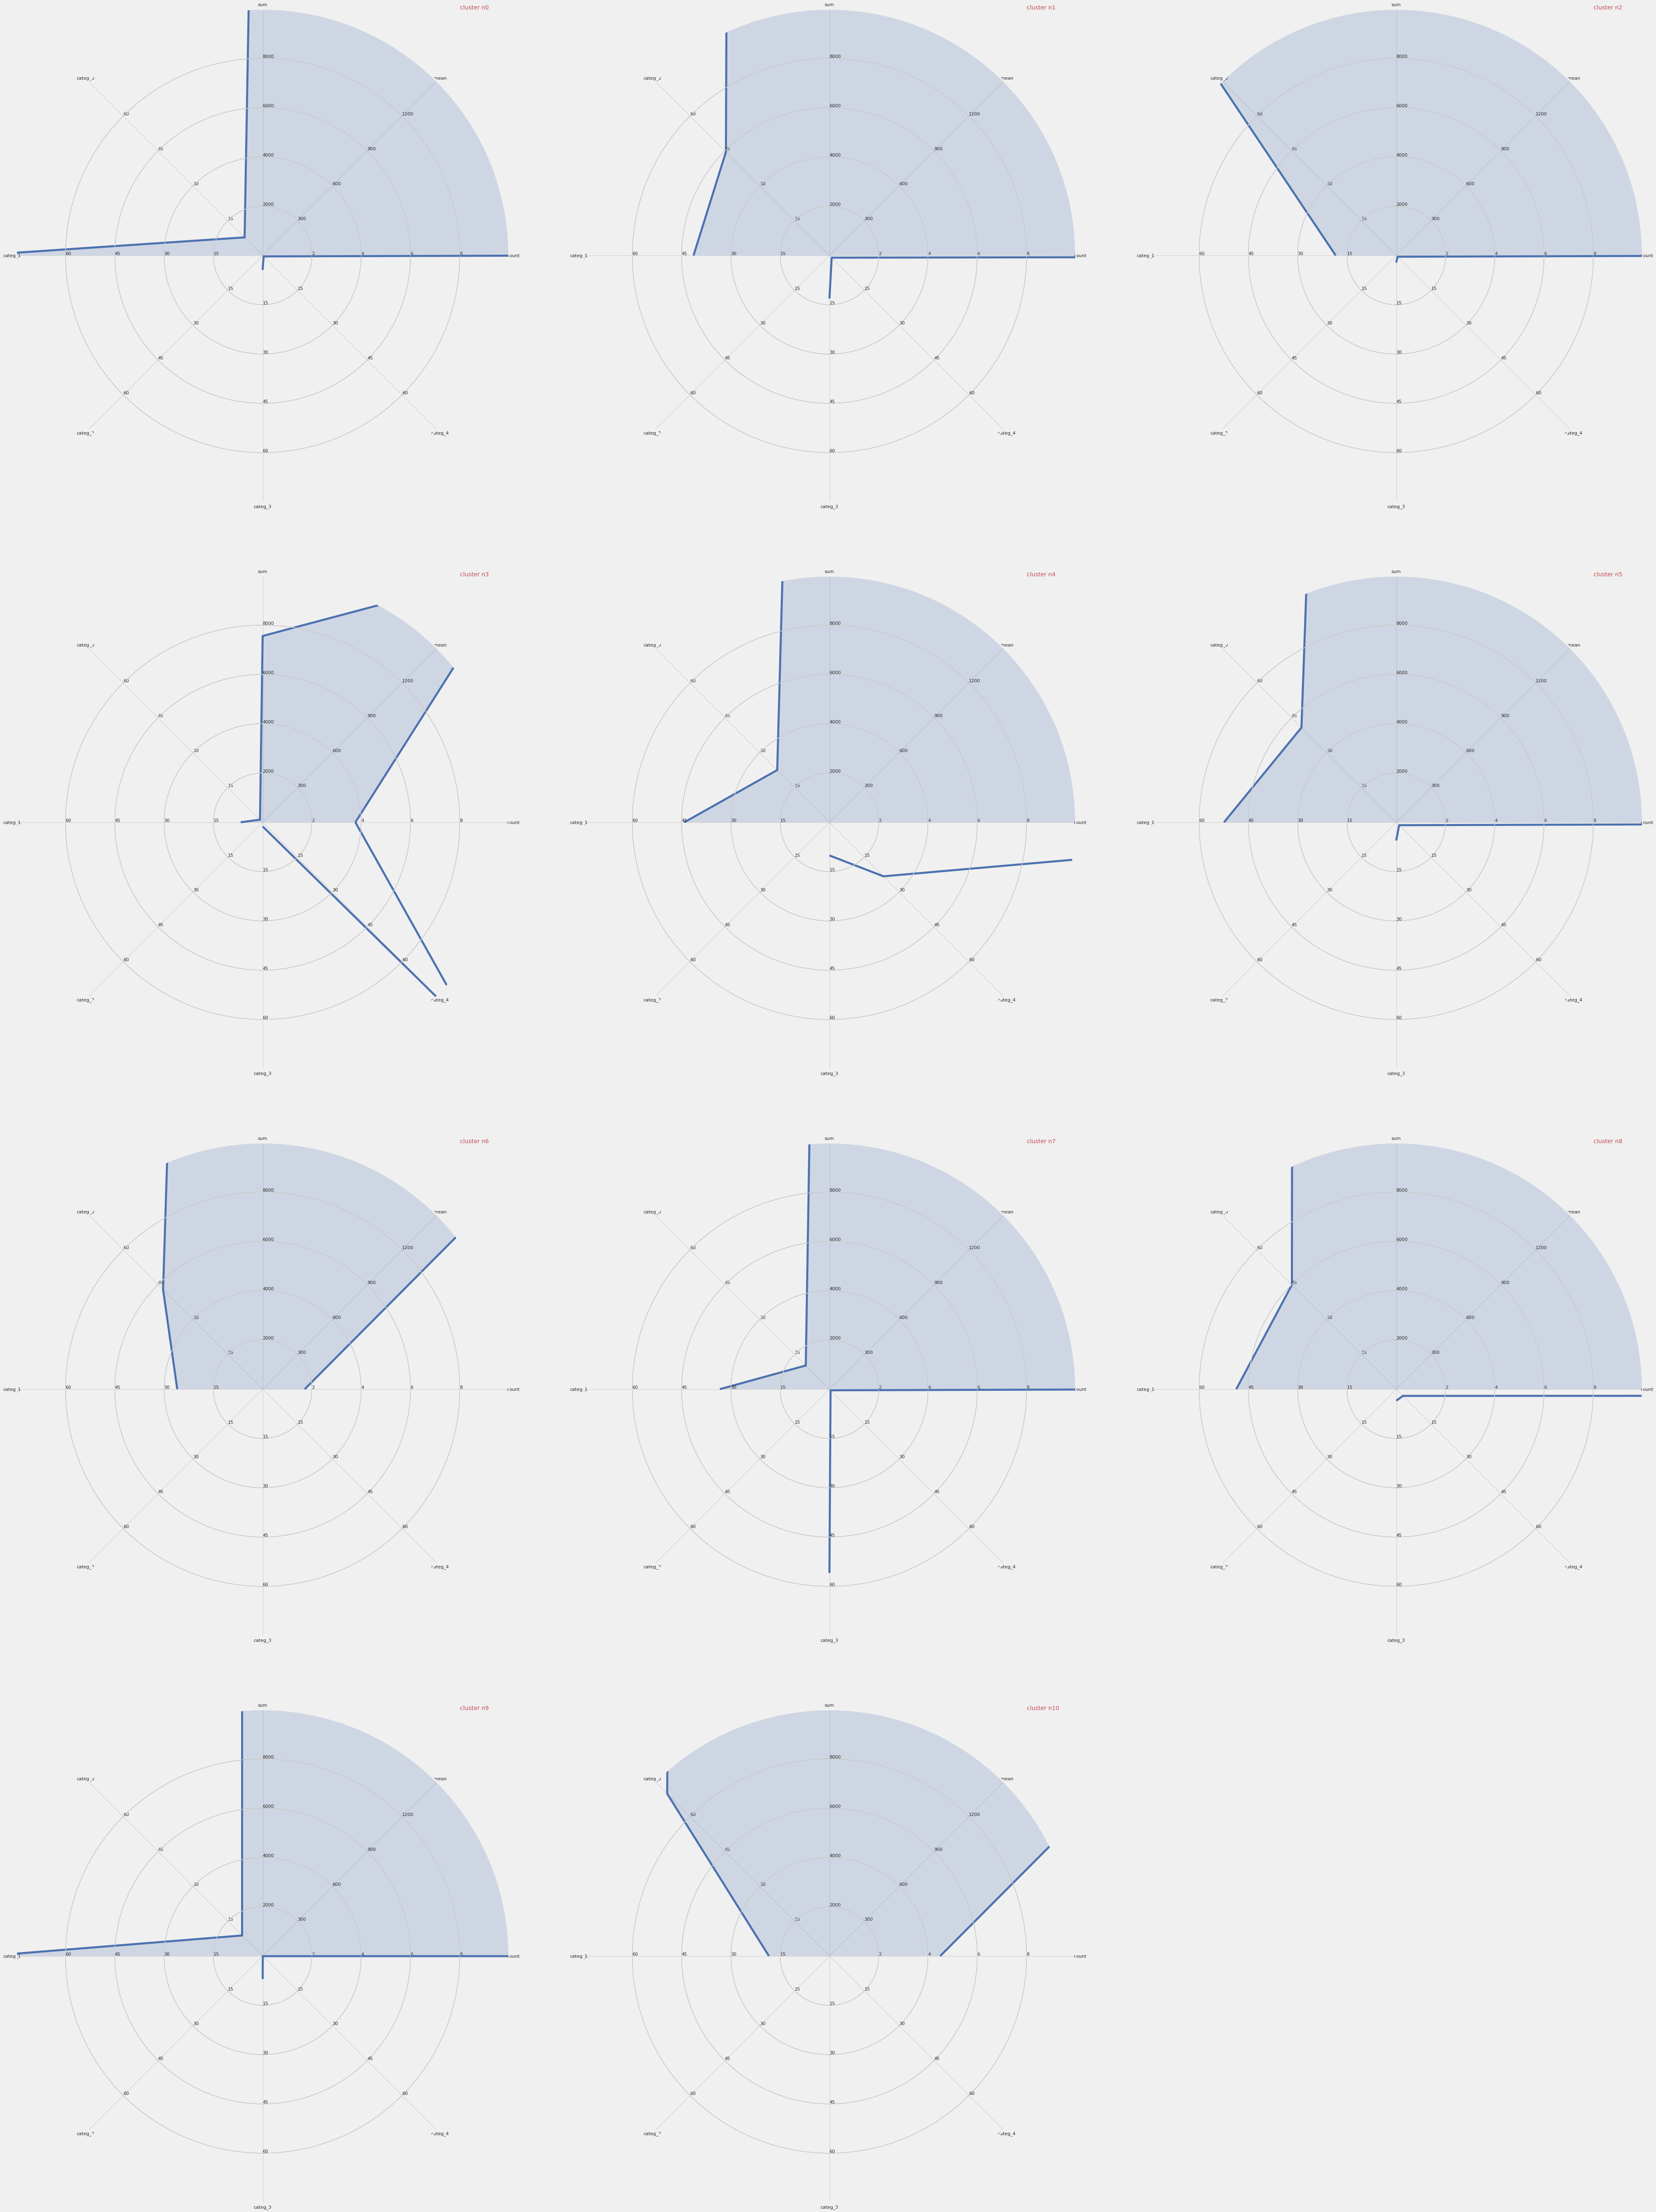

In [ ]:
fig = plt.figure(figsize=(50,50))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])  
    #print (data)
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=5.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster n{}'.format(index[ind]), color = 'r')
    ind += 1

### Classification of customers
In this part, the objective will be to adjust a classifier that will classify consumers in the different client categories that were established in the previous section. The objective is to make this classification possible at the first visit. To fulfill this objective, I will test several classifiers implemented in scikit-learn. First, in order to simplify their use, I define a class that allows to interface several of the functionalities common to these different classifiers:

In [ ]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))


Since the goal is to define the class to which a client belongs and this, as soon as its first visit, I only keep the variables that describe the content of the basket, and do not take into account the variables related to the frequency of visits or variations of the basket price over time:

In [ ]:

selected_customers.head()

,Customer_Code,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase,cluster
0,30000040295,17,433.04,4330.37,1441.438824,24504.460,34.100078,56.881890,0.0,9.018032,0.000000,32,346,5
1,30000040297,36,277.05,7794.72,2003.844861,72138.415,11.077593,65.186468,0.0,23.281091,1.055138,1,340,0
2,30000040301,27,433.04,23866.11,5581.459630,150699.410,59.211685,40.788315,0.0,0.000000,0.000000,0,360,5
3,30000040302,37,433.04,15178.41,2842.328108,105166.140,28.450089,69.378604,0.0,0.000000,2.171307,0,337,5
4,30000040303,18,554.10,7850.89,1951.003889,35118.070,50.917605,49.082395,0.0,0.000000,0.000000,4,331,5


In [ ]:

columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

Finally, I split the dataset in train and test sets:

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)



### Support Vector Machine Classifier (SVC)
The first classifier I use is the SVC classifier. In order to use it, I create an instance of the Class_Fit class and then callgrid_search(). When calling this method, I provide as parameters:

the hyperparameters for which I will seek an optimal value
the number of folds to be used for cross-validation

In [ ]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 2)

Once this instance is created, I adjust the classifier to the training data:

In [ ]:
svc.grid_fit(X = X_train, Y = Y_train)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, in

In [ ]:
svc.grid_predict(X_test, Y_test)

Precision: 80.52 % 


### Confusion matrix
The accuracy of the results seems to be correct. Nevertheless, let us remember that when the different classes were defined, there was an imbalance in size between the classes obtained. In particular, one class contains around 40% of the clients. It is therefore interesting to look at how the predictions and real values compare to the breasts of the different classes. This is the subject of the confusion matrices and to represent them, I use the code of the sklearn documentation:

In [ ]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
   
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
## from which I create the following representation:

Confusion matrix, without normalization


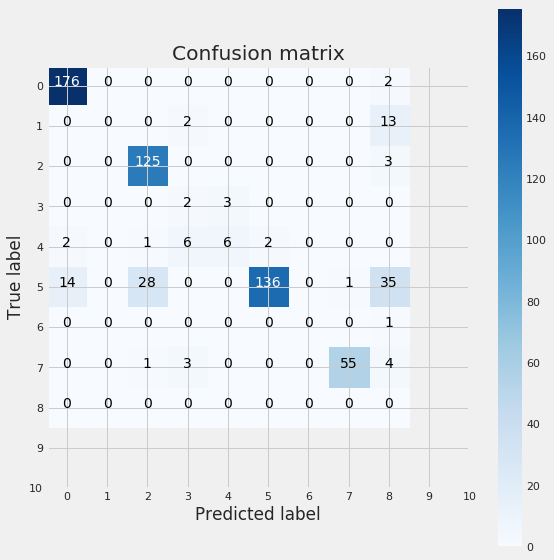

In [ ]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')


### Learning curve
A typical way to test the quality of a fit is to draw a learning curve. In particular, this type of curves allow to detect possible drawbacks in the model, linked for example to over- or under-fitting. This also shows to which extent the mode could benefit from a larger data sample. In order to draw this curve,

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from which I represent the leanring curve of the SVC classifier:

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


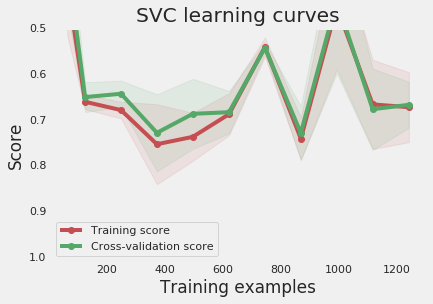

In [ ]:

g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.5],
                        cv = 2,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

On this curve, we can see that the train and cross-validation curves converge towards the same limit when the sample size increases. This is typical of modeling with low variance and proves that the model does not suffer from overfitting. Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. Hence the model does not underfit the data.

## Revised approach
### Logistic Regression
I now consider the logistic regression classifier. As before, I create an instance of the Class_Fit class, adjust the model on the training data and see how the predictions compare to the real values:

In [ ]:

lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

Precision: 76.49 % 


/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Then, I plot the learning curve to have a feeling of the quality of the model:

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


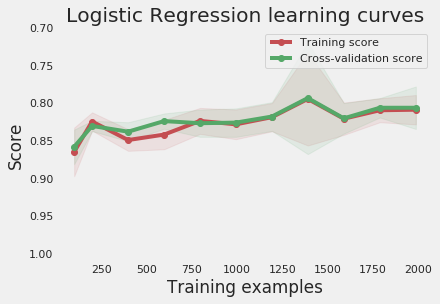

In [ ]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### k-Nearest Neighbors

In [ ]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Precision: 78.10 % 


/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


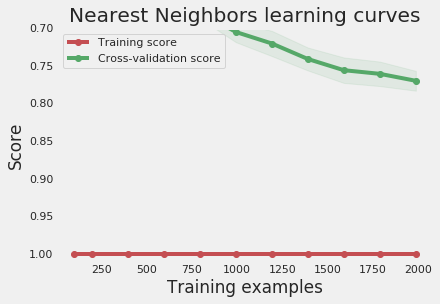

In [ ]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Decision Tree

In [ ]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Precision: 92.59 % 


/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


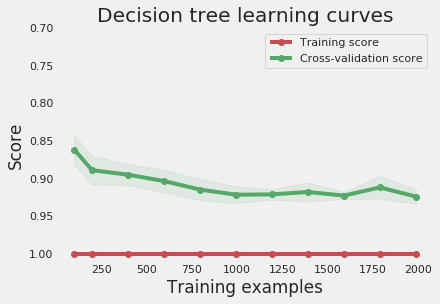

In [ ]:

g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Random Forest

In [ ]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Precision: 94.36 % 


/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


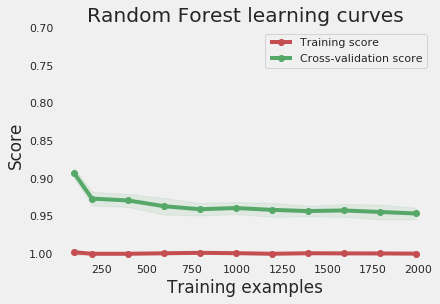

In [ ]:

g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### AdaBoost Classifier

In [ ]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Precision: 61.35 % 


/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


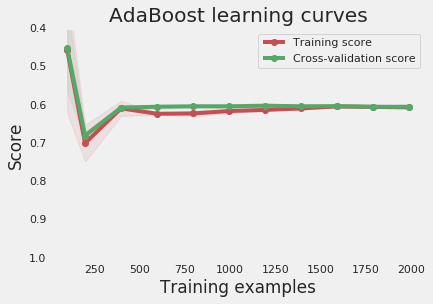

In [ ]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.4], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Gradient Boosting Classifier

In [ ]:

gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

/home/arvind/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Precision: 94.52 % 


In [ ]:

g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


## Best approach
### Let's vote !
Finally, the results of the different classifiers presented in the previous sections can be combined to improve the classification model. This can be achieved by selecting the customer category as the one indicated by the majority of classifiers. To do this, I use the VotingClassifier method of the sklearn package. As a first step, I adjust the parameters of the various classifiers using the best parameters previously found:

In [ ]:

rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

Then, I define a classifier that merges the results of the various classifiers:

In [ ]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')

In [ ]:
votingC = votingC.fit(X_train, Y_train)

In [ ]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 94.20 % 


Note that when defining the votingC classifier, I only used a sub-sample of the whole set of classifiers defined above and only retained the Random Forest, the k-Nearest Neighbors and the Gradient Boosting classifiers. In practice, this choice has been done with respect to the performance of the classification carried out in the next section.

### Testing predictions¶


In [ ]:
basket_price = set_test.copy(deep = True)

In a first step, I regroup reformattes these data according to the same procedure as used on the training set. However, I am correcting the data to take into account the difference in time between the two datasets and weights the variables count and sum to obtain an equivalence with the training set:

In [ ]:
transactions_per_user=basket_price.groupby(by=['Customer_Code'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['Customer_Code'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['Customer_Code'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('Customer_Code', ascending = True)[:5]

,Customer_Code,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,30000046218,85,433.04,8839.30,1867.946176,158775.425,48.780187,44.260927,0.0,6.958885,0.000000
1,30000046220,15,578.61,866.08,687.203333,10308.050,29.924185,70.075815,0.0,0.000000,0.000000
2,30000046221,25,433.04,3897.35,1367.638000,34190.950,18.043371,81.956629,0.0,0.000000,0.000000
3,30000046222,310,433.04,86607.17,4768.955000,1478376.050,44.736936,53.361406,0.0,1.644226,0.257431
4,30000046223,120,280.31,2229.46,930.215417,111625.850,46.218954,53.781046,0.0,0.000000,0.000000


Then, I convert the dataframe into a matrix and retain only variables that define the category to which consumers belong. At this level, I recall the method of normalization that had been used on the training set:

In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#
matrix_test = transactions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

In [ ]:
Y = kmeans.predict(scaled_test_matrix)

Finally, in order to prepare the execution of the classifier, it is sufficient to select the variables on which it acts:

In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [ ]:

classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]

for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 71.43 % 
______________________________ 
Logostic Regression
Precision: 73.77 % 
______________________________ 
k-Nearest Neighbors
Precision: 84.85 % 
______________________________ 
Decision Tree
Precision: 86.70 % 
______________________________ 
Random Forest
Precision: 86.70 % 
______________________________ 
Gradient Boosting
Precision: 86.82 % 


Finally, as anticipated in revised approach, it is possible to improve the quality of the classifier by combining their respective predictions. At this level, I chose to mix Random Forest, Gradient Boosting and k-Nearest Neighbors predictions because this leads to a slight improvement in predictions:

In [ ]:

predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 86.58 % 
